# **EXPLORATORY DATA ANALYSIS**
# *ENHANCING WORSHOP SAFETY: DETECTING PERSONAL PROTECTIVE EQUIPMENT*


Group: DIP crew


*   Apaza Leonel
*   Luna Grace
*   Condori Selene
*   Castro Sergio
<center>
<img src='https://drive.google.com/uc?id=1oz2xPugqnGNoYXZcFreM_3rUIPfJxx3y' width='50%'> </center>

The dataset for the project was collected by recording videos in the CS202, welding laboratory, of our classmates.



Once the photos were taken, they were uploaded to a drive folder to put all the files together because the photos were taken with two different cameras. Now that the images have been saved in the cloud all the group memebers can see and review them. Then, we use Roboflow to upload all the images to annotate the different objects that we want to detect. This website help us to to this process less tedious as more than one person can work making the annotations.
The next step is export the dataset with the csv file that Roboflow have generated.
 First we will have to give access to the google drive account to work  with Collab.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


We will import pandas library that give us functions to work with datasets, data manipulation and analysis. Besides, we will create a variable to create a dataframe with the csv file. Since, we have made this step, we can inspect data from this csv file. All the images are in jpg format in order to avoid troubles with different formats.

In [ ]:
import pandas as pd

ruta_archivo = '/content/drive/My Drive/EDA1_2/EEP/train/_annotations.csv'
data = pd.read_csv(ruta_archivo)

print(data.head(10).to_string(index=False))


                                            filename  width  height  class  xmin  ymin  xmax  ymax
epp_1854_jpg.rf.5fe411fa7d9e1271a8e2ce923bf42c14.jpg   1080    1920 gloves   178   275   370   573
epp_5167_jpg.rf.606accae2e5d83b9493dc6c0fc7f482b.jpg   1080    1920 helmet   450   355   633   620
epp_1117_jpg.rf.6034695bee4690a9fec96dad1926f180.jpg   1080    1920 gloves   709   832   852  1047
epp_1117_jpg.rf.6034695bee4690a9fec96dad1926f180.jpg   1080    1920 gloves   206   817   367  1024
epp_6677_jpg.rf.608239d1c0ef6e5ab0551148a6504d5f.jpg   1080    1920 helmet   375   295   570   555
epp_6677_jpg.rf.608239d1c0ef6e5ab0551148a6504d5f.jpg   1080    1920 coleto   278   530   725  1335
epp_6677_jpg.rf.608239d1c0ef6e5ab0551148a6504d5f.jpg   1080    1920 gloves   315   410   465   668
epp_3439_jpg.rf.601e1b1f841ec00bde9ad6af88c2af6b.jpg   1080    1920 helmet   449   319   683   623
epp_3439_jpg.rf.601e1b1f841ec00bde9ad6af88c2af6b.jpg   1080    1920 coleto   323   544   796  1302
epp_4220_j

The next function give us information about the data type of each column, also it show us the memory usage. This table is a representation of the structure and composition of this dataframe.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12709 entries, 0 to 12708
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  12709 non-null  object
 1   width     12709 non-null  int64 
 2   height    12709 non-null  int64 
 3   class     12709 non-null  object
 4   xmin      12709 non-null  int64 
 5   ymin      12709 non-null  int64 
 6   xmax      12709 non-null  int64 
 7   ymax      12709 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 794.4+ KB


This method provides descriptive statistics for numerical columns in the dataframe data. It includes metrics such as count, mean, standard deviation, minimum, maximum and others. These statistics offer insights into the distribution and variability of the numerical data. Besides, it helps identify outliers and understand the range and spread of values within each numerical feature.

In [ ]:
data.describe()

,width,height,xmin,ymin,xmax,ymax
count,12709.0,12709.0,12709.000000,12709.000000,12709.000000,12709.000000
mean,1080.0,1920.0,412.960107,613.500197,668.840428,986.903297
std,0.0,0.0,165.585742,205.522121,169.413395,270.007290
min,1080.0,1920.0,0.000000,0.000000,203.000000,475.000000
25%,1080.0,1920.0,297.000000,455.000000,565.000000,735.000000
50%,1080.0,1920.0,405.000000,578.000000,678.000000,1010.000000
75%,1080.0,1920.0,505.000000,778.000000,790.000000,1210.000000
max,1080.0,1920.0,908.000000,1133.000000,1080.000000,1613.000000


Now, we will see some samples that we have in the dataset. A short explanation of how we decide to take these pictures is that we wanted to show different angles and depth of the objects that we will detect.

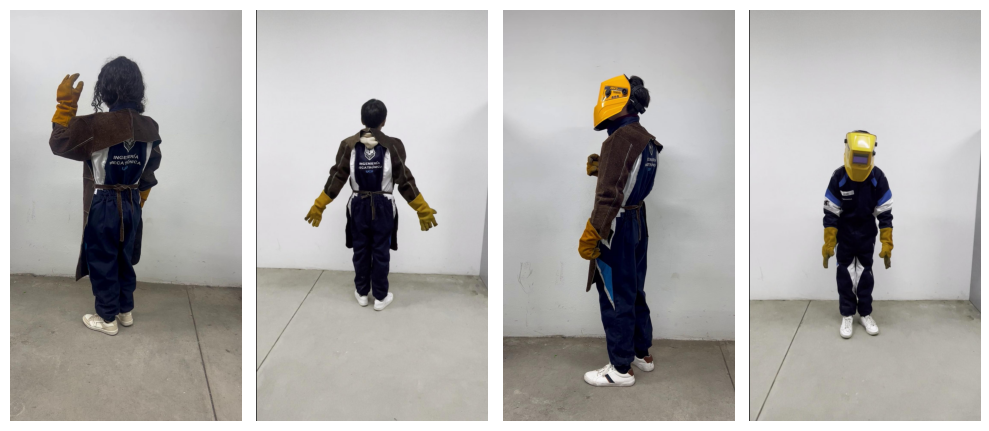

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 5))
image_path_1 = data.iloc[0]['filename']
image_path_2 = data.iloc[2]['filename']
image_path_3 = data.iloc[100]['filename']
image_path_4 = data.iloc[311]['filename']


img1 = mpimg.imread('/content/drive/My Drive/EDA1_2/EEP/train/' + image_path_1)
axes[0].imshow(img1)
axes[0].axis('off')


img2 = mpimg.imread('/content/drive/My Drive/EDA1_2/EEP/train/' + image_path_2)
axes[1].imshow(img2)
axes[1].axis('off')

img3 = mpimg.imread('/content/drive/My Drive/EDA1_2/EEP/train/' + image_path_3)
axes[2].imshow(img3)
axes[2].axis('off')

img3 = mpimg.imread('/content/drive/My Drive/EDA1_2/EEP/train/' + image_path_4)
axes[3].imshow(img3)
axes[3].axis('off')

plt.tight_layout()
plt.show()



In the following cell we can see how many instances we have for each class. There is a variation in the number of gloves and the others because in the pictures there were two gloves. That is why the glove class number increase. The annotations will increment with data augmentation.

In [ ]:
class_counts = data['class'].value_counts()
print(class_counts)

class
gloves    5960
coleto    3599
helmet    3150
Name: count, dtype: int64


This cell will clasify the images per their dimensions. This dataset have not any type of preprocessing methods. The images have been taken with the same cameras that is why all the samples have the same dimensions.

In [ ]:
target_width = 1080
target_height = 1920
count=0

target_images = data[(data['width'] == target_width) & (data['height'] == target_height)]

num_images = len(target_images)

print(f"Dimmensions {target_width}x{target_height}: {num_images} images")

Dimmensions 1080x1920: 12709 images


Finally, here we an example of how the coleto was annotated for this image. This result was made by taking the values of xmax, xmin, ymax and ymin columns to draw the bounding box with the cv2.rectangle function.

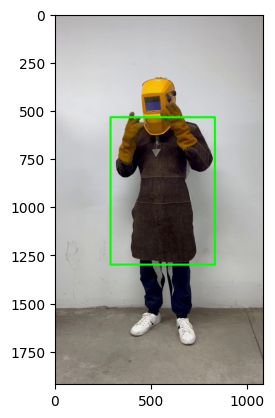

In [ ]:
import cv2
import matplotlib.pyplot as plt

imagen = data.iloc[500]['filename']
img11 = cv2.imread('/content/drive/My Drive/EDA1_2/EEP/train/' + imagen)
rgb= cv2.cvtColor(img11, cv2.COLOR_BGR2RGB)
x1 = data.iloc[500]['xmin']
x11 = data.iloc[500]['xmax']
y1 = data.iloc[500]['ymin']
y11 = data.iloc[500]['ymax']



for index, fila in datos.iterrows():
    cv2.rectangle(rgb, (x1,y1),(x11, y11), (0, 255, 0), 10)

plt.imshow(rgb)


The dataset, that contains all the images collected and the csv file, is saved in the following link https://drive.google.com/drive/folders/1ZOu34wuXdjAd3WT8RJhh1meHvAPRWpgB?usp=sharing